**install libraries**

In [ ]:
!pip install facets-overview==1.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import  libraries**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import math
# For facets
from IPython.core.display import display, HTML
import base64
from facets_overview.feature_statistics_generator import FeatureStatisticsGenerator
import seaborn as sns 


# **Data  preparation**

**Load data**

In [ ]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv('world_university_rankings_2016.csv')
original_data.head()
original_data

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
0,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,33.0,67.0
1,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,46.0,54.0
2,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,42.0,58.0
3,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,46.0,54.0
4,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,37.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,601,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,NaN,21958.0,15.3,3.0,48.0,52.0
796,601,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,NaN,31268.0,28.7,2.0,36.0,64.0
797,601,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,NaN,4122.0,3.7,3.0,NaN,NaN
798,601,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,NaN,10117.0,12.1,8.0,28.0,72.0


In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   world_rank           800 non-null    int64  
 1   university_name      800 non-null    object 
 2   country              800 non-null    object 
 3   teaching             800 non-null    float64
 4   international        800 non-null    float64
 5   research             800 non-null    float64
 6   citations            800 non-null    float64
 7   income               763 non-null    float64
 8   total_score          200 non-null    float64
 9   num_students         793 non-null    float64
 10  student_staff_ratio  793 non-null    float64
 11  international%       790 non-null    float64
 12  female%              736 non-null    float64
 13  male%                736 non-null    float64
dtypes: float64(11), int64(1), object(2)
memory usage: 87.6+ KB


In [ ]:
original_data.describe()

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
count,800.000000,800.0000,800.000000,800.000000,800.00000,763.000000,200.000000,793.000000,793.000000,790.000000,736.000000,736.000000
mean,356.611250,31.5840,48.500375,28.128625,51.30975,46.869594,62.520000,24161.264817,19.116393,12.702532,49.538043,50.461957
std,193.900379,14.9854,23.690816,19.532270,27.04544,20.576165,12.040555,22569.224842,12.522003,10.676075,11.962238,11.962238
min,1.000000,9.9000,7.100000,2.900000,1.20000,28.000000,48.800000,462.000000,0.600000,0.000000,1.000000,0.000000
25%,200.750000,21.0000,29.450000,14.350000,27.52500,31.600000,52.900000,12331.000000,12.300000,5.000000,45.000000,43.000000
50%,351.000000,27.0000,45.700000,22.100000,50.30000,38.600000,57.950000,20174.000000,16.600000,10.000000,52.000000,48.000000
75%,526.000000,37.5000,65.450000,35.525000,74.90000,55.250000,69.625000,29700.000000,22.400000,18.000000,57.000000,55.000000
max,601.000000,95.6000,99.900000,99.000000,100.00000,100.000000,95.200000,379231.000000,162.600000,82.000000,100.000000,99.000000


 We'll then randomize the data, just to be sure not to get any pathological ordering effects that might harm the performance of the models we use 

In [ ]:

original_data_not_sorted= original_data.reindex(np.random.permutation(original_data.index))
original_data_not_sorted.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international%,female%,male%
558,501,National Central University,Taiwan,26.3,27.1,23.2,17.5,75.3,NaN,10915.0,9.8,6.0,31.0,69.0
414,401,Charles University in Prague,Czech Republic,31.5,52.8,21.5,41.0,28.2,NaN,51438.0,13.0,15.0,62.0,38.0
200,201,Aalborg University,Denmark,25.1,71.0,28.4,73.8,43.7,NaN,17422.0,15.9,15.0,48.0,52.0
264,251,University of Georgia,United States of America,41.1,39.2,30.5,52.2,30.9,NaN,33119.0,19.9,7.0,57.0,43.0
405,401,Bar-Ilan University,Israel,22.6,49.4,21.3,42.3,28.9,NaN,17503.0,16.0,5.0,59.0,41.0


we can observe that we have a missing value in some of samples , it's most remarquable for the total score column , so to deal with this problem we will 
* not consider the total score (200/800)
* replace the NAN value for other columns with the mean value 

In [ ]:
original_data_new= original_data[["university_name","world_rank",	"country",	"teaching",	"international",	"research" ,	"citations" ,"income" ,	"num_students"	, "student_staff_ratio" ,	"international%"	, "female%" ,	"male%"]]
original_data_new = original_data_new.fillna(original_data_new.mean()) 
original_data_new 

<ipython-input-10-1d18361f0e74>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  original_data_new = original_data_new.fillna(original_data_new.mean())


,university_name,world_rank,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
0,California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27.0,33.000000,67.000000
1,University of Oxford,2,United Kingdom,86.5,94.4,98.9,98.8,73.1,19919.0,11.6,34.0,46.000000,54.000000
2,Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22.0,42.000000,58.000000
3,University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34.0,46.000000,54.000000
4,Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33.0,37.000000,63.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Yeungnam University,601,South Korea,18.6,24.3,10.9,26.5,35.4,21958.0,15.3,3.0,48.000000,52.000000
796,Yıldız Technical University,601,Turkey,14.5,14.9,7.6,19.3,44.0,31268.0,28.7,2.0,36.000000,64.000000
797,Yokohama City University,601,Japan,24.0,16.1,10.2,36.4,37.9,4122.0,3.7,3.0,49.538043,50.461957
798,Yokohama National University,601,Japan,20.1,23.3,16.0,13.5,40.4,10117.0,12.1,8.0,28.000000,72.000000


in order to manipulates numeric values data , we have to separate our data in numeric and categorical data

In [ ]:
original_data_new .columns
categorical_feature_names = ['country',"university_name"]
#we will not consider the word rank because it not apporting us any further information for our segmentation approch 
numeric_feature_names = list(set(original_data_new .columns) - set(categorical_feature_names) - set(original_data_new["world_rank"]))
numeric_feature_names

['research',
 'international%',
 'international',
 'citations',
 'world_rank',
 'female%',
 'teaching',
 'male%',
 'student_staff_ratio',
 'income',
 'num_students']

there are some country who are with a badly written , so we have to correct them 

In [ ]:
original_data_new.replace("Unisted States of America","United States of America")
original_data_new.replace('Unted Kingdom' ,"United Kingdom")
                                                           


In [ ]:
original_data_new.country.value_counts().head(5)

United States of America    146
United Kingdom               77
Japan                        41
Germany                      37
China                        37
Name: country, dtype: int64

we can certfy that  the country United States of America  and United Kingdom contain and  the high number of univerties in our dataset 

# **Data viz and data analysis**

With hist function we will do a  representation of the distribution of data, it calls matplotlib.pyplot.hist, on each series in the DataFrame, resulting in one histogram per column.

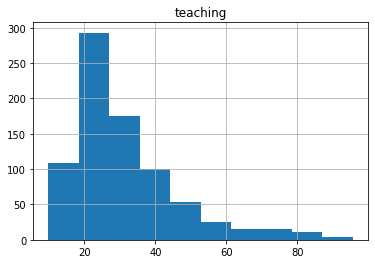

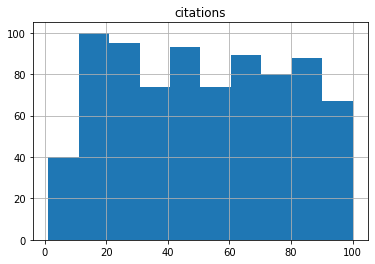

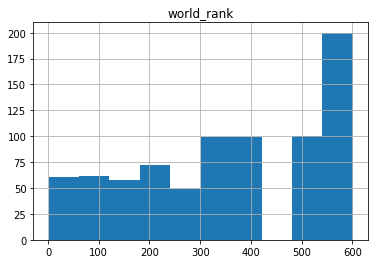

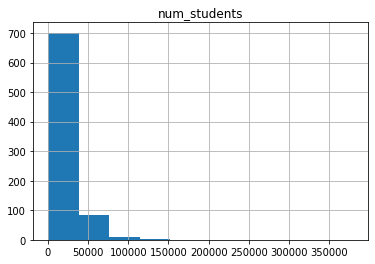

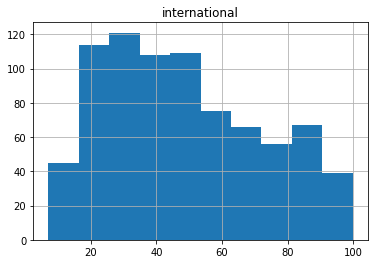

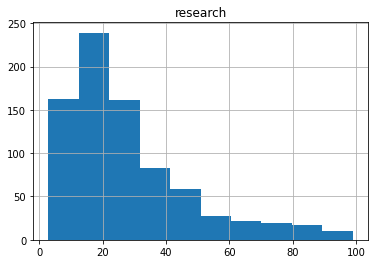

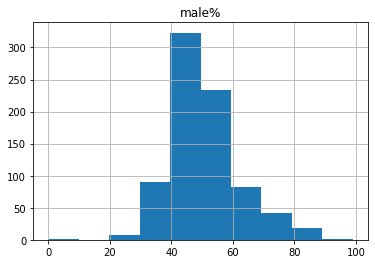

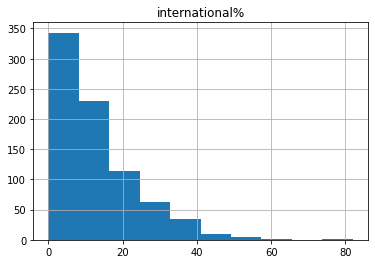

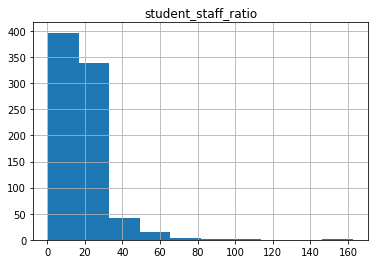

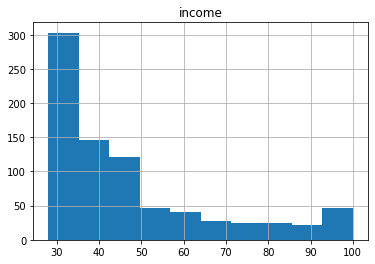

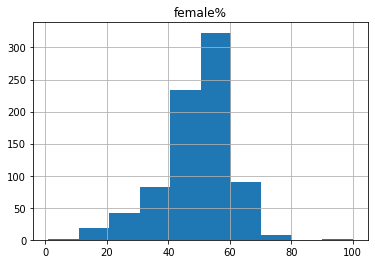

In [ ]:
for feature in numeric_feature_names:
  original_data_new.hist(column=feature)

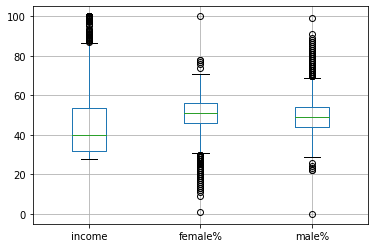

In [ ]:
original_data_new.boxplot(column = ["income",'female%','male%'])


Make a box plot from DataFrame columns , A box plot is a method for graphically depicting groups of numerical data through their quartiles.
The box extends from the Q1 to Q3 quartile values of the data,
with a line at the median (Q2). 
the median for income is 40 , ~55 for female number and ~50 male 

In [ ]:
original_data_new.corr()

,world_rank,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
world_rank,1.000000,-0.766838,-0.556343,-0.820840,-0.902511,-0.307604,0.042241,0.031541,-0.449042,-0.081573,0.081573
teaching,-0.766838,1.000000,0.293105,0.907430,0.565086,0.337159,0.001179,-0.184848,0.310011,-0.066169,0.066169
international,-0.556343,0.293105,1.000000,0.406048,0.508391,0.032549,-0.129322,0.010690,0.833735,0.230052,-0.230052
research,-0.820840,0.907430,0.406048,1.000000,0.618008,0.415308,0.028764,-0.037112,0.378694,-0.051300,0.051300
citations,-0.902511,0.565086,0.508391,0.618008,1.000000,0.124212,-0.090035,-0.033884,0.388772,0.162784,-0.162784
income,-0.307604,0.337159,0.032549,0.415308,0.124212,1.000000,0.028837,0.083320,0.050063,-0.255410,0.255410
num_students,0.042241,0.001179,-0.129322,0.028764,-0.090035,0.028837,1.000000,0.479178,-0.158641,0.192686,-0.192686
student_staff_ratio,0.031541,-0.184848,0.010690,-0.037112,-0.033884,0.083320,0.479178,1.000000,-0.059492,0.158739,-0.158739
international%,-0.449042,0.310011,0.833735,0.378694,0.388772,0.050063,-0.158641,-0.059492,1.000000,0.107873,-0.107873
female%,-0.081573,-0.066169,0.230052,-0.051300,0.162784,-0.255410,0.192686,0.158739,0.107873,1.000000,-1.000000


with this function we can compute  the pairwise correlation of all columns in our dataset , 
from the result shown below, the most related features sorted in decending way are :
1.   research and teaching(0.9)
2.   citation and research(0.61)
3.  citation and teaching(0.56) 



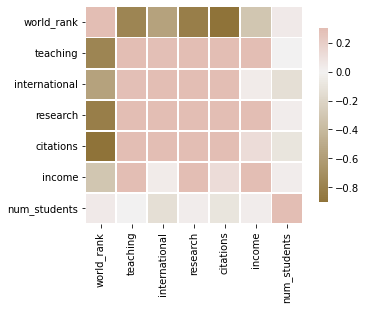

In [ ]:
cmap = sns.diverging_palette(420, 20, as_cmap=True)
sns.heatmap(original_data_new[["world_rank"	,"teaching"	,"international"	,"research",	"citations",	"income"	,"num_students"]].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.8, cbar_kws={"shrink": .8})

In [ ]:
pd.pivot_table(original_data_new, index = 'country', values = 'world_rank').sort_values('world_rank',ascending=False)

,world_rank
country,
Argentina,601.000000
Egypt,601.000000
Nigeria,601.000000
Qatar,601.000000
Morocco,601.000000
...,...
Sweden,170.454545
Hong Kong,165.666667
Switzerland,159.300000


In [ ]:
pd.pivot_table(original_data_new, index = ['world_rank', "university_name"], values = 'num_students').sort_values("num_students",ascending=False)

num_students
world_rank university_name                                          
601        Anadolu University                               379231.0
           Cairo University                                 231941.0
           University of South Africa                       197102.0
401        National Autonomous University of Mexico         137378.0
601        Alexandria University                            127431.0
...                                                              ...
201        Royal Veterinary College                           1819.0
301        Gwangju Institute of Science and Technology        1394.0
           Medical College of Wisconsin                       1211.0
180        Scuola Superiore Sant’Anna                          769.0
112        Scuola Normale Superiore di Pisa                    462.0

[800 rows x 1 columns]

In [ ]:
pd.pivot_table(original_data_new, index = ['country',"world_rank"], values = 'income').sort_values("income",ascending=False)

,,income
country,world_rank,
United States of America,20,100.0
China,47,100.0
South Korea,116,100.0
Belgium,35,100.0
South Korea,148,100.0
...,...,...
Republic of Ireland,160,28.0
Denmark,301,28.0
Colombia,501,28.0


In [ ]:
df1=pd.pivot_table(original_data_new, index = ['country'],aggfunc='sum',sort=False).head(5)
df1

,citations,female%,income,international,international%,male%,num_students,research,student_staff_ratio,teaching,world_rank
country,,,,,,,,,,,
United States of America,10321.8,7336.766304,6520.995937,6195.0,1790.702532,7263.233696,3.297378e+06,5453.2,2133.316393,5980.1,35660
United Kingdom,4689.3,4122.076087,2654.769594,6046.7,2101.405063,3577.923913,1.373165e+06,2390.1,1329.832787,2490.7,23123
Switzerland,756.5,482.538043,650.069594,929.4,284.000000,517.461957,1.309400e+05,414.5,165.800000,415.4,1593
Canada,1471.8,1373.076087,1181.700000,1663.0,377.000000,1126.923913,7.170540e+05,906.1,541.600000,868.6,6532
Singapore,165.0,97.000000,149.700000,190.8,67.000000,103.000000,5.662000e+04,145.8,31.700000,120.1,81


In [ ]:
pd.pivot_table(original_data_new, index = ['university_name',"income","world_rank"], values = 'teaching').sort_values("teaching",ascending=True)

,,,teaching
university_name,income,world_rank,
Qatar University,55.200000,601,9.9
"California State University, Long Beach",46.869594,601,11.6
Anadolu University,100.000000,601,12.2
American University of Sharjah,33.300000,601,12.4
I-Shou University,41.000000,601,12.8
...,...,...,...
University of Oxford,73.100000,2,86.5
University of Cambridge,55.000000,4,88.2
Massachusetts Institute of Technology,95.400000,5,89.4


In [ ]:
pd.pivot_table(original_data_new[original_data_new.country == 'United States of America'], index = 'international', values = 'income').sort_values('income', ascending = False)

,income
international,
70.0,100.0
56.5,100.0
45.1,99.8
84.0,95.4
61.5,90.4
...,...
17.4,28.9
40.1,28.6
32.4,28.5


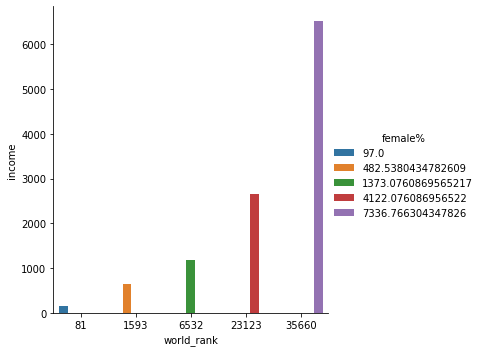

In [ ]:
#plot the country with high values(income, citation,..)
sns.catplot(data=df1, x="world_rank", y="income", hue="female%", kind="bar")

In [ ]:
df2=original_data_new.sort_values("teaching",ascending = False).head(5)
df2

,university_name,world_rank,country,teaching,international,research,citations,income,num_students,student_staff_ratio,international%,female%,male%
0,California Institute of Technology,1,United States of America,95.6,64.0,97.6,99.8,97.8,2243.0,6.9,27.0,33.0,67.0
2,Stanford University,3,United States of America,92.5,76.3,96.2,99.9,63.3,15596.0,7.8,22.0,42.0,58.0
4,Massachusetts Institute of Technology,5,United States of America,89.4,84.0,88.6,99.7,95.4,11074.0,9.0,33.0,37.0,63.0
3,University of Cambridge,4,United Kingdom,88.2,91.5,96.7,97.0,55.0,18812.0,11.8,34.0,46.0,54.0
11,Yale University,12,United States of America,86.5,64.3,87.8,97.2,43.3,11751.0,4.4,20.0,50.0,50.0


Text(0.5, 1.0, 'university_name VS teaching pie plot')

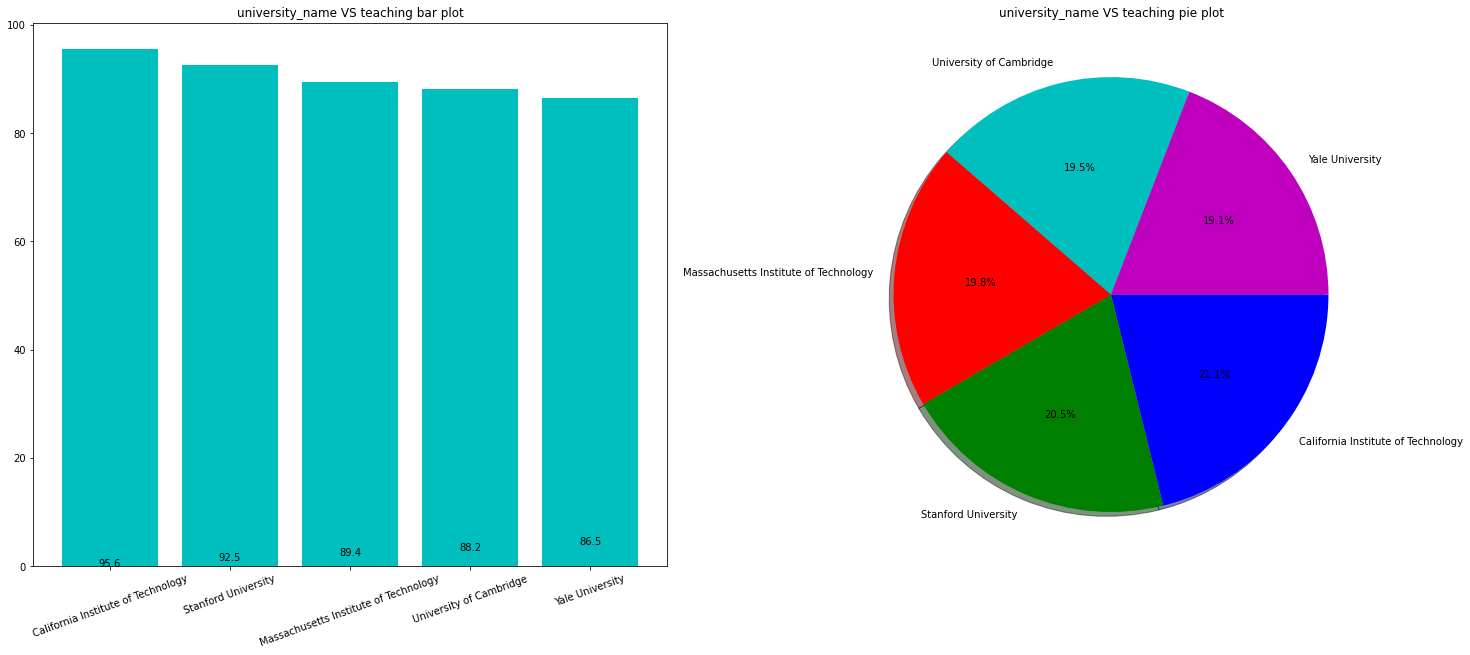

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16,9))

colors = ['b', 'g', 'r', 'c', 'm', 'y']
values = list(df2.teaching)

axs[0,0].bar(df2.university_name, df2.teaching,color="c")
for index, value in enumerate(df2.university_name):
   axs[0,0].text(value, index,
             str(values[index]))

axs[0,0].set_xticklabels(df2.university_name,rotation=20)
axs[0,0].set_title('university_name VS teaching bar plot')

axs[0,1].pie(values, colors=colors, labels= df2.university_name,counterclock=False, shadow=True)
axs[0,1].set_title('university_name VS teaching pie plot')




 this setup code cell also installs Facets, an open-source tool created by PAIR that contains two robust visualizations we'll be using to aid in understanding and analyzing ML datasets.
 The facets project contains two visualizations for understanding and analyzing machine learning datasets: Facets Overview and Facets Dive.For more information visit [the official site](https://pair-code.github.io/facets/).

The visualizations are implemented as Polymer web components, backed by Typescript code and can be easily embedded into Jupyter notebooks or webpages.

In [ ]:
#@title Visualize the Data in Facets
fsg = FeatureStatisticsGenerator()
dataframes = [
    {'table': original_data_new, 'name': 'Data_vis'}]
censusProto = fsg.ProtoFromDataFrames(dataframes)
protostr = base64.b64encode(censusProto.SerializeToString()).decode("utf-8")


HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [ ]:
#@title Set the Number of Data Points to Visualize in Facets Dive

SAMPLE_SIZE =400 #@param
  
data_dive = original_data_new.sample(SAMPLE_SIZE).to_json(orient='records')

HTML_TEMPLATE = """<script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=data_dive)
display(HTML(html))

you can play with differents settings to change the graph below according to your needs

In [ ]:
numeric_feature_names

['teaching',
 'citations',
 'world_rank',
 'num_students',
 'international',
 'research',
 'male%',
 'international%',
 'student_staff_ratio',
 'income',
 'female%']

In [ ]:

#in purpose to have columns values with the same scale we will standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(original_data_new[numeric_feature_names])
X_scaled

array([[ 4.27456366,  1.79403943, -1.83513678, ..., -0.98050904,
         2.5361808 , -1.44235777],
       [ 3.66692605,  1.75704149, -1.82997626, ..., -0.60327885,
         1.30619521, -0.30856882],
       [ 4.06756624,  1.79773922, -1.82481575, ..., -0.90827347,
         0.81818473, -0.65742695],
       ...,
       [-0.50640919, -0.55163006,  1.26117153, ..., -1.23734662,
        -0.44665874,  0.        ],
       [-0.76682531, -1.39888291,  1.26117153, ..., -0.56314797,
        -0.32216628, -1.87843044],
       [-1.02724143, -0.840214  ,  1.26117153, ...,  0.11907685,
        -0.35204447, -0.57021242]])

In [ ]:
df.to_csv('eda_data.csv')